<a href="https://colab.research.google.com/github/johnreyes96/modeling-and-simulation/blob/master/src/main/python/classes/ClassificationTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Tabla de contenido:**
* Introducción
* El RMS Titanic
* Importar bibliotecas
* Obtener los datos
* Exploración/Análisis de datos
* Preprocesamiento de datos
    - Datos perdidos
    - Funciones de conversión
    - Creación de categorías
    - Creación de nuevas características
* Construcción de modelos de aprendizaje automático
    - Entrenamiento 8 modelos diferentes
    - ¿Cuál es el mejor modelo?

# **Introducción**

Construtir un modelo de aprendizaje automático con el  conjunto de datos del Titanic, este data set proporciona información sobre el destino de los pasajeros del Titanic, un resumen según estatus económico (clase), sexo, edad y supervivencia. En este notebook, debemos pronosticar si un pasajero del Titanic habría sobrevivido o no.


# **El RMS Titanic**

RMS Titanic fue un transatlántico de pasajeros británico que se hundió en el Océano Atlántico Norte en las primeras horas de la mañana del 15 de abril de 1912, después de chocar con un iceberg durante su viaje inaugural desde Southampton a la ciudad de Nueva York. Se estima que había 2.224 pasajeros y tripulantes a bordo del barco, y más de 1.500 murieron, lo que lo convierte en uno de los desastres marítimos comerciales en tiempos de paz más mortíferos de la historia moderna. El RMS Titanic era el barco más grande a flote en el momento en que entró en servicio y fue el segundo de los tres transatlánticos de clase olímpica operados por White Star Line. El Titanic fue construido por el astillero Harland and Wolff en Belfast. Thomas Andrews, su arquitecto, murió en el desastre.

# **Cargando las Librarias**

In [ ]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Obteniendo los datos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/modeling_and_simulation

/content/drive/MyDrive/modeling_and_simulation


In [ ]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# **Exploración/análisis de datos**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**El conjunto de entrenamiento tiene 891 ejemplos y 11 características + la variable objetivo (survived)**. 2 de las características son flotantes, 5 son enteros y 5 son objetos. A continuación las características con una breve descripción:

    survival:	Survival
    PassengerId: Unique Id of a passenger.
    pclass:	Ticket class	
    sex:	Sex	
    Age:	Age in years	
    sibsp:	# of siblings / spouses aboard the Titanic	
    parch:	# of parents / children aboard the Titanic	
    ticket:	Ticket number	
    fare:	Passenger fare	
    cabin:	Cabin number	
    embarked:	Port of Embarkation

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Arriba podemos ver que **38% del conjunto de entrenamiento sobrevivió al Titanic**. También podemos ver que las edades de los pasajeros oscilan entre 0,4 y 80 años. Además de eso, ya podemos detectar algunas funciones que contienen valores faltantes, como la función 'Edad'.

In [ ]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


De la tabla anterior, podemos notar algunas cosas. En primer lugar, **necesitamos convertir muchas funciones en funciones numéricas** más adelante, para que los algoritmos de aprendizaje automático puedan procesarlas. Además, podemos ver que las **características tienen rangos muy diferentes**, que necesitaremos convertir aproximadamente a la misma escala. También podemos detectar algunas características más, que contienen valores faltantes (NaN).

**Detallando los datos que realmente faltan:**

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0



La función Embarked tiene solo 2 valores faltantes, que se pueden completar fácilmente. Será mucho más complicado trabajar con la función 'age', que tiene 177 valores faltantes. La función "Cabin" necesita más investigación, pero podríamos eliminarla del conjunto de datos, ya que falta el 77 %.

In [ ]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Arriba puede ver las 11 características + la variable de destino (survived). **¿Qué características podrían contribuir a una alta tasa de supervivencia?**

Para mí, tendría sentido si todo excepto 'PassengerId', 'Ticket' y 'Name' se correlacionaran con una alta tasa de supervivencia.

**1. Age and Sex:**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


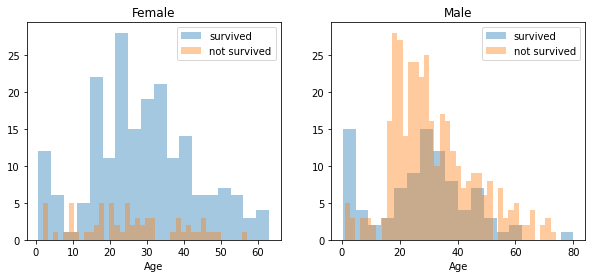

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Puede ver que los hombres tienen una alta probabilidad de supervivencia cuando tienen entre 18 y 30 años, lo que también es un poco cierto para las mujeres, pero no del todo. Para las mujeres, las posibilidades de supervivencia son mayores entre los 14 y los 40 años.

Para los hombres, la probabilidad de supervivencia es muy baja entre los 5 y los 18 años, pero eso no es cierto para las mujeres. Otra cosa a tener en cuenta es que los bebés también tienen una probabilidad un poco mayor de supervivencia.

Dado que para **ciertas edades, tienen mayores probabilidades de supervivencia** y como queremos que todas las características estén aproximadamente en la misma escala, se crean grupos de edad más adelante.

**2. Embarked, Pclass  and Sex:**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


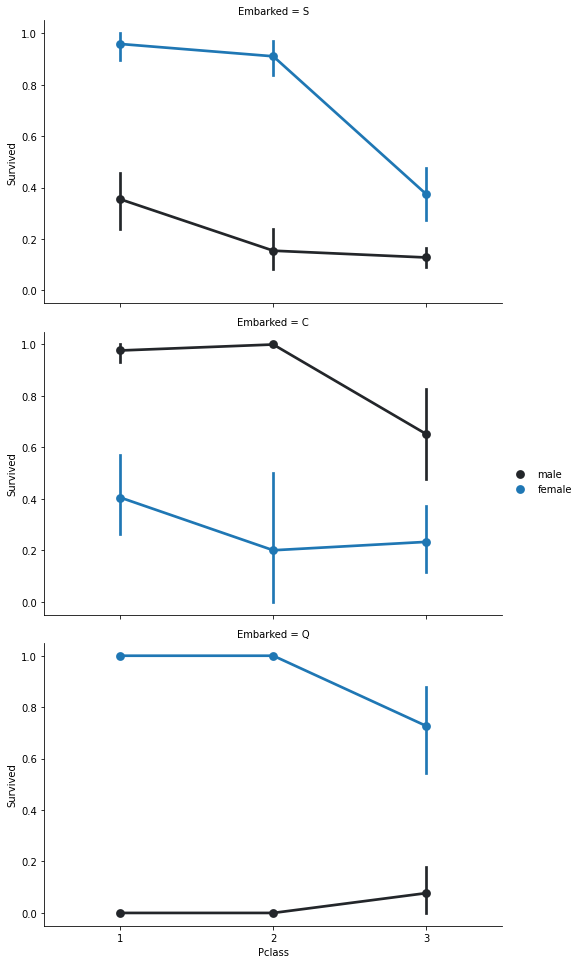

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked parece estar correlacionado con la supervivencia, dependiendo del género.

Las mujeres en el puerto Q y en el puerto S tienen una mayor probabilidad de supervivencia. Lo contrario es cierto, si están en el puerto C. Los hombres tienen una alta probabilidad de supervivencia si están en el puerto C, pero una probabilidad baja si están en el puerto Q o S.

Pclass también parece estar correlacionado con la supervivencia.

**3. Pclass:**

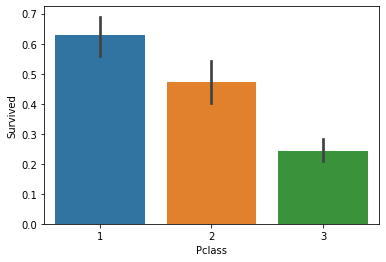

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Aquí vemos claramente que Pclass está contribuyendo a la posibilidad de supervivencia de una persona, especialmente si esta persona está en la clase 1. 

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


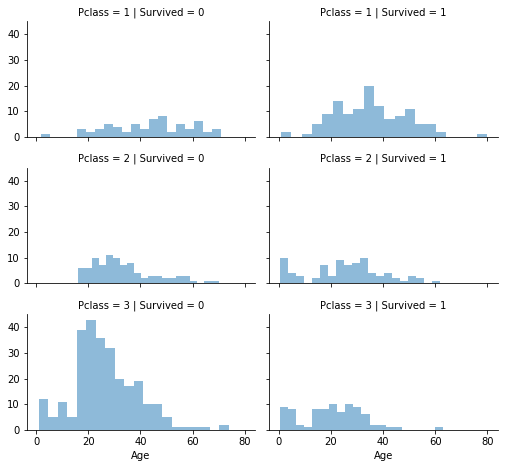

In [ ]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

El gráfico anterior confirma la suposición sobre la pclass 1, pero también podemos detectar una alta probabilidad de que una persona en la pclass 3 no sobreviva.

**4.  SibSp and Parch:**

SibSp y Parch tendrían más sentido como una característica combinada, que muestra el número total de familiares que una persona tiene en el Titanic. A continuación se crea y también se agrega una característica que muestre si alguien no está solo.

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [ ]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


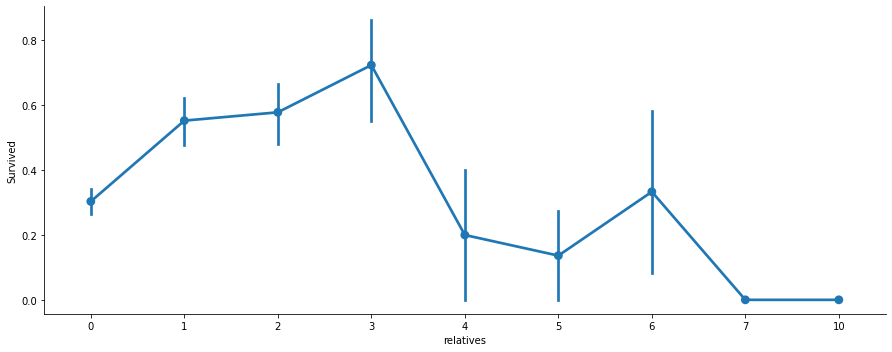

In [ ]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

Aquí podemos ver que tenían una alta probabilidad de supervivencia con 1 a 3 familiares, pero menor si tenías menos de 1 o más de 3 (salvo algunos casos con 6 familiares).

# **Data Preprocessing**

Primero, eliminar 'PassengerId' del conjunto de train, porque no contribuye a la probabilidad de supervivencia de una persona. No se eliminara del conjunto de prueba, ya que se requiere allí para el envío.

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)

## Datos Faltantes:
### Cabin:
Como recordatorio, tenemos que lidiar con Cabin (687), Embarked (2) y Age (177).

Tendriamos que eliminar la variable 'Cabin' pero un número de cabina parece "C123" y la **letra se refiere a la cubierta**.

Por lo tanto, vamos a extraerlos y crear una nueva característica que contenga algunas personas. Posteriormente, convertiremos la función en una variable numérica. Los valores faltantes se convertirán a cero.

En la imagen a continuación, puede ver las cubiertas reales del Titanic, que van desde la A hasta la G.

![titanic decks](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

In [ ]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [ ]:
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

### Age:

Ahora podemos abordar el problema con los valores faltantes de las características de edad. Se crea una matriz que contenga números aleatorios, que se calculan en función del valor de la edad media con respecto a la desviación estándar y is_null.

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [ ]:
train_df["Age"].isnull().sum()

0

### Embarked:

Dado que la función Embarked solo tiene 2 valores faltantes, solo los completaremos con el más común.

In [ ]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Funciones de conversión:

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


Arriba puede ver que 'fare' es un flotante y tenemos que trabajar con 4 características categóricas: Name, Sex, Ticket and Embarked Investiguemos y transformemos uno tras otro.

### Fare:

Convirtiendo Fare" de float a int64, utilizando la función "astype()" que proporciona pandas:

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name:

Usaremos la función Nombre para extraer los Títulos del Nombre, de modo que podamos crear una nueva función a partir de eso.

In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### Sex:

Convierta la función 'Sex' en numérica.

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Ticket:

In [ ]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Dado que el atributo Ticket tiene 681 tickets únicos, será un poco complicado convertirlos en categorías útiles. Así que lo eliminaremos del conjunto de datos.

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Embarked:

Convierte la característica 'Embarked' en numérica.


In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Creación de categorías:

Ahora crearemos categorías dentro de las siguientes características:



### Age:
Ahora necesitamos convertir la función 'edad'. Primero lo convertiremos de flotante a entero. Luego, crearemos la nueva variable 'AgeGroup", categorizando cada edad en un grupo. Tener en cuenta que es importante prestar atención a cómo forman estos grupos, ya que no se desea, por ejemplo, que el 80% de sus datos caigan en grupo 1.

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
# let's see how it's distributed
train_df['Age'].value_counts()

4    164
6    160
5    151
3    144
2    110
1     94
0     68
Name: Age, dtype: int64

### Fare:
Para la función 'Fare', debemos hacer lo mismo que con la función 'Age'. Pero no es tan fácil, porque si dividimos el rango de los valores de las tarifas en unas pocas categorías igualmente grandes, el 80% de los valores caerían en la primera categoría. Afortunadamente, podemos usar la función sklearn "qcut()", que podemos usar para ver cómo podemos formar las categorías.

In [ ]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,4,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creando nuevas funciones

Agregar dos características nuevas al conjunto de datos, que se calcula a partir de otras características.

### 1. Age times Class

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### 2.  Fare per Person

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [ ]:
# Let's take a last look at the training set, before we start training the models.
train_df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,4,0,0,1,2,0,1,8,1,12,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1



# **Construcción de modelos de aprendizaje automático**

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [ ]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

print(round(acc_sgd,2,), "%")

78.9 %


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.37 %


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.82 %


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

85.07 %


In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

78.45 %


In [ ]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

81.37 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

81.14 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

92.37 %



##  Cual es el mejor modelo ?

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.37,Random Forest
92.37,Decision Tree
85.07,KNN
81.82,Logistic Regression
81.37,Perceptron
81.14,Support Vector Machines
78.90,Stochastic Gradient Decent
78.45,Naive Bayes



Como podemos ver, el clasificador Random Forest es el mejor.


